# Lab 4: BPN Classifier for Website Phishing Detection

## Objective
Build a Backpropagation Neural Network (BPN) classifier for the Website Phishing dataset from UCI ML Repository. We will:
- Load and explore the dataset
- Perform necessary preprocessing
- Train and test with at least two different network configurations
- Provide classification reports and analyze the results

---


## 1. Import Libraries and Load Dataset


In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# For reproducibility
np.random.seed(42)

print("Libraries imported successfully!")


Libraries imported successfully!


In [8]:
# Fetch dataset from UCI ML Repository
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
website_phishing = fetch_ucirepo(id=379) 
  
# data (as pandas dataframes) 
X = website_phishing.data.features 
y = website_phishing.data.targets 
  
print("Dataset loaded successfully!")
print(f"\nFeatures shape: {X.shape}")
print(f"Targets shape: {y.shape}")


Dataset loaded successfully!

Features shape: (1353, 9)
Targets shape: (1353, 1)


In [9]:
# Display metadata
print("="*80)
print("DATASET METADATA")
print("="*80)
print(website_phishing.metadata)
print("\n" + "="*80)
print("VARIABLE INFORMATION")
print("="*80)
print(website_phishing.variables)


DATASET METADATA
{'uci_id': 379, 'name': 'Website Phishing', 'repository_url': 'https://archive.ics.uci.edu/dataset/379/website+phishing', 'data_url': 'https://archive.ics.uci.edu/static/public/379/data.csv', 'abstract': '\n\n', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1353, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5B301', 'creators': ['Neda Abdelhamid'], 'intro_paper': {'ID': 440, 'type': 'NATIVE', 'title': 'Phishing detection based Associative Classification data mining', 'authors': 'Neda Abdelhamid, A. Ayesh, F. Thabtah', 'venue': 'Expert systems with applications', 'year': 2014, 'journal': None, 'DOI': '10.1016/j.eswa.2014.03.019', 'URL': 'https://www.semanticscholar.org/paper/867e2293e9780

## 2. Data Exploration and Analysis


In [10]:
# Check for missing values
print("Missing values in features:")
print(X.isnull().sum().sum())
print("\nMissing values in targets:")
print(y.isnull().sum().sum())

# Check data types
print("\nData types of features:")
print(X.dtypes.value_counts())
print("\nData types of targets:")
print(y.dtypes)


Missing values in features:
0

Missing values in targets:
0

Data types of features:
int64    9
Name: count, dtype: int64

Data types of targets:
Result    int64
dtype: object


In [11]:
# Basic statistics
print("Statistical summary of features:")
print(X.describe())


Statistical summary of features:
               SFH  popUpWindow  SSLfinal_State  Request_URL  URL_of_Anchor  \
count  1353.000000  1353.000000     1353.000000  1353.000000    1353.000000   
mean      0.237990    -0.258684        0.327421    -0.223208      -0.025129   
std       0.916389     0.679072        0.822193     0.799682       0.936262   
min      -1.000000    -1.000000       -1.000000    -1.000000      -1.000000   
25%      -1.000000    -1.000000        0.000000    -1.000000      -1.000000   
50%       1.000000     0.000000        1.000000     0.000000       0.000000   
75%       1.000000     0.000000        1.000000     0.000000       1.000000   
max       1.000000     1.000000        1.000000     1.000000       1.000000   

       web_traffic   URL_Length  age_of_domain  having_IP_Address  
count  1353.000000  1353.000000    1353.000000        1353.000000  
mean      0.000000    -0.053215       0.219512           0.114560  
std       0.806776     0.762552       0.975970     

## 3. Data Preprocessing

Preprocessing steps:
1. Handle missing values (if any)
2. Encode categorical variables (if any)
3. Split data into training and testing sets
4. Standardize features for better neural network performance


In [12]:
# Create a copy of the data
X_processed = X.copy()
y_processed = y.copy()

# Flatten y if it's a DataFrame
if isinstance(y_processed, pd.DataFrame):
    y_processed = y_processed.values.ravel()

# Check if there are any non-numeric columns in X
print("Feature data types:")
print(X_processed.dtypes)

# Convert any categorical columns to numeric if needed
for col in X_processed.columns:
    if X_processed[col].dtype == 'object':
        le = LabelEncoder()
        X_processed[col] = le.fit_transform(X_processed[col])
        print(f"Encoded column: {col}")

print("\nPreprocessing completed!")
print(f"Final feature shape: {X_processed.shape}")
print(f"Final target shape: {y_processed.shape}")


Feature data types:
SFH                  int64
popUpWindow          int64
SSLfinal_State       int64
Request_URL          int64
URL_of_Anchor        int64
web_traffic          int64
URL_Length           int64
age_of_domain        int64
having_IP_Address    int64
dtype: object

Preprocessing completed!
Final feature shape: (1353, 9)
Final target shape: (1353,)


In [13]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, test_size=0.2, random_state=42, stratify=y_processed
)

print("Data split completed!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())
print(f"\nTesting set class distribution:")
print(pd.Series(y_test).value_counts())


Data split completed!
Training set size: 1082 samples
Testing set size: 271 samples

Training set class distribution:
-1    562
 1    438
 0     82
Name: count, dtype: int64

Testing set class distribution:
-1    140
 1    110
 0     21
Name: count, dtype: int64


In [14]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")
print(f"\nScaled features mean: {X_train_scaled.mean():.6f}")
print(f"Scaled features std: {X_train_scaled.std():.6f}")


Feature scaling completed!
Scaled training data shape: (1082, 9)
Scaled testing data shape: (271, 9)

Scaled features mean: 0.000000
Scaled features std: 1.000000


## 4. BPN Model Configuration 1: Single Hidden Layer

**Configuration Details:**
- Architecture: Input Layer → Hidden Layer (100 neurons) → Output Layer
- Activation Function: ReLU
- Solver: Adam optimizer
- Max Iterations: 500
- Random State: 42


In [15]:
# Create and train BPN Model 1
print("="*80)
print("TRAINING BPN MODEL 1: Single Hidden Layer (100 neurons)")
print("="*80)

mlp_model1 = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=True
)

# Train the model
mlp_model1.fit(X_train_scaled, y_train)

print("\nModel 1 training completed!")
print(f"Number of iterations: {mlp_model1.n_iter_}")
print(f"Loss: {mlp_model1.loss_:.6f}")


TRAINING BPN MODEL 1: Single Hidden Layer (100 neurons)
Iteration 1, loss = 1.15275299
Iteration 2, loss = 1.01108407
Iteration 3, loss = 0.89504667
Iteration 4, loss = 0.80012832
Iteration 5, loss = 0.72674254
Iteration 6, loss = 0.66898382
Iteration 7, loss = 0.62317078
Iteration 8, loss = 0.58855218
Iteration 9, loss = 0.56050772
Iteration 10, loss = 0.53804812
Iteration 11, loss = 0.51937659
Iteration 12, loss = 0.50392508
Iteration 13, loss = 0.49024864
Iteration 14, loss = 0.47853409
Iteration 15, loss = 0.46816534
Iteration 16, loss = 0.45922109
Iteration 17, loss = 0.45136893
Iteration 18, loss = 0.44420370
Iteration 19, loss = 0.43796107
Iteration 20, loss = 0.43260928
Iteration 21, loss = 0.42734033
Iteration 22, loss = 0.42264762
Iteration 23, loss = 0.41842691
Iteration 24, loss = 0.41442107
Iteration 25, loss = 0.41054032
Iteration 26, loss = 0.40700811
Iteration 27, loss = 0.40352236
Iteration 28, loss = 0.40048089
Iteration 29, loss = 0.39724749
Iteration 30, loss = 0.39

In [16]:
# Make predictions
y_train_pred1 = mlp_model1.predict(X_train_scaled)
y_test_pred1 = mlp_model1.predict(X_test_scaled)

# Calculate accuracies
train_accuracy1 = accuracy_score(y_train, y_train_pred1)
test_accuracy1 = accuracy_score(y_test, y_test_pred1)

print("="*80)
print("MODEL 1 PERFORMANCE")
print("="*80)
print(f"Training Accuracy: {train_accuracy1*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy1*100:.2f}%")
print(f"Difference: {abs(train_accuracy1 - test_accuracy1)*100:.2f}%")


MODEL 1 PERFORMANCE
Training Accuracy: 95.29%
Testing Accuracy: 88.56%
Difference: 6.73%


In [17]:
# Classification Report for Model 1
print("\n" + "="*80)
print("CLASSIFICATION REPORT - MODEL 1 (Training Data)")
print("="*80)
print(classification_report(y_train, y_train_pred1))

print("\n" + "="*80)
print("CLASSIFICATION REPORT - MODEL 1 (Testing Data)")
print("="*80)
print(classification_report(y_test, y_test_pred1))



CLASSIFICATION REPORT - MODEL 1 (Training Data)
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96       562
           0       0.91      0.96      0.93        82
           1       0.95      0.95      0.95       438

    accuracy                           0.95      1082
   macro avg       0.94      0.96      0.95      1082
weighted avg       0.95      0.95      0.95      1082


CLASSIFICATION REPORT - MODEL 1 (Testing Data)
              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       140
           0       0.80      0.57      0.67        21
           1       0.88      0.90      0.89       110

    accuracy                           0.89       271
   macro avg       0.86      0.80      0.82       271
weighted avg       0.88      0.89      0.88       271



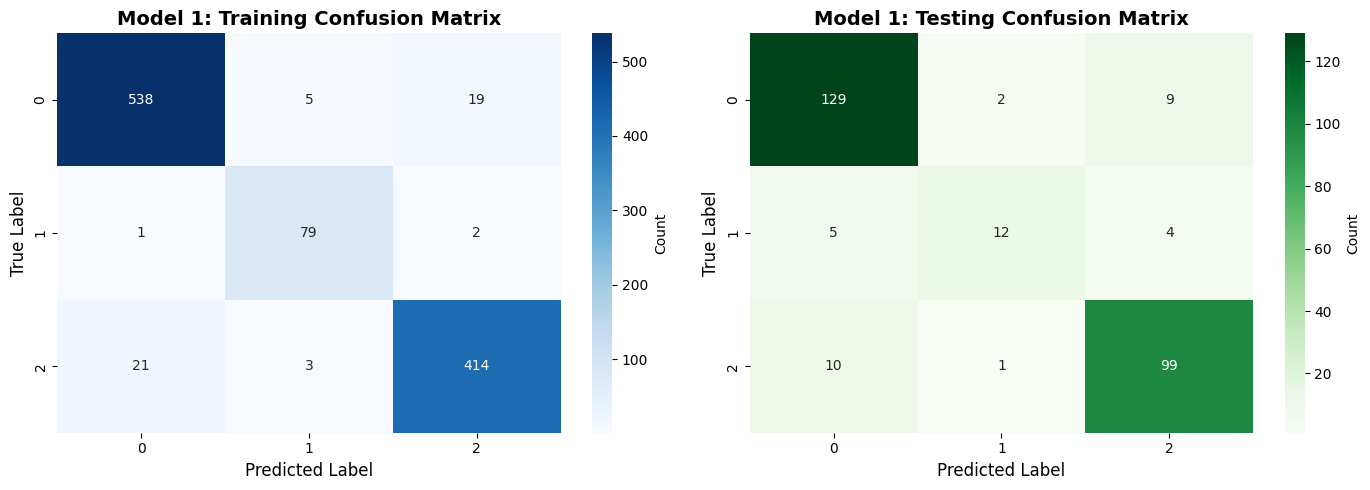

In [18]:
# Confusion Matrix for Model 1
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training confusion matrix
cm_train1 = confusion_matrix(y_train, y_train_pred1)
sns.heatmap(cm_train1, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Model 1: Training Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)

# Testing confusion matrix
cm_test1 = confusion_matrix(y_test, y_test_pred1)
sns.heatmap(cm_test1, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Model 1: Testing Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()


## 5. BPN Model Configuration 2: Multiple Hidden Layers

**Configuration Details:**
- Architecture: Input Layer → Hidden Layer 1 (150 neurons) → Hidden Layer 2 (100 neurons) → Hidden Layer 3 (50 neurons) → Output Layer
- Activation Function: ReLU
- Solver: Adam optimizer
- Max Iterations: 500
- Random State: 42


In [19]:
# Create and train BPN Model 2
print("="*80)
print("TRAINING BPN MODEL 2: Multiple Hidden Layers (150, 100, 50 neurons)")
print("="*80)

mlp_model2 = MLPClassifier(
    hidden_layer_sizes=(150, 100, 50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    verbose=True
)

# Train the model
mlp_model2.fit(X_train_scaled, y_train)

print("\nModel 2 training completed!")
print(f"Number of iterations: {mlp_model2.n_iter_}")
print(f"Loss: {mlp_model2.loss_:.6f}")


TRAINING BPN MODEL 2: Multiple Hidden Layers (150, 100, 50 neurons)
Iteration 1, loss = 1.02401461
Iteration 2, loss = 0.71835931
Iteration 3, loss = 0.56399637
Iteration 4, loss = 0.50885323
Iteration 5, loss = 0.46891616
Iteration 6, loss = 0.44110579
Iteration 7, loss = 0.41789566
Iteration 8, loss = 0.40110598
Iteration 9, loss = 0.38495875
Iteration 10, loss = 0.36807540
Iteration 11, loss = 0.35527579
Iteration 12, loss = 0.34276864
Iteration 13, loss = 0.33056768
Iteration 14, loss = 0.31856185
Iteration 15, loss = 0.30853872
Iteration 16, loss = 0.29770435
Iteration 17, loss = 0.28834300
Iteration 18, loss = 0.27980941
Iteration 19, loss = 0.27059212
Iteration 20, loss = 0.26244854
Iteration 21, loss = 0.25503294
Iteration 22, loss = 0.24857964
Iteration 23, loss = 0.24098665
Iteration 24, loss = 0.23512259
Iteration 25, loss = 0.22821146
Iteration 26, loss = 0.22224556
Iteration 27, loss = 0.21656097
Iteration 28, loss = 0.20999964
Iteration 29, loss = 0.20468021
Iteration 30,

In [20]:
# Make predictions
y_train_pred2 = mlp_model2.predict(X_train_scaled)
y_test_pred2 = mlp_model2.predict(X_test_scaled)

# Calculate accuracies
train_accuracy2 = accuracy_score(y_train, y_train_pred2)
test_accuracy2 = accuracy_score(y_test, y_test_pred2)

print("="*80)
print("MODEL 2 PERFORMANCE")
print("="*80)
print(f"Training Accuracy: {train_accuracy2*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy2*100:.2f}%")
print(f"Difference: {abs(train_accuracy2 - test_accuracy2)*100:.2f}%")


MODEL 2 PERFORMANCE
Training Accuracy: 95.84%
Testing Accuracy: 86.35%
Difference: 9.49%


In [21]:
# Classification Report for Model 2
print("\n" + "="*80)
print("CLASSIFICATION REPORT - MODEL 2 (Training Data)")
print("="*80)
print(classification_report(y_train, y_train_pred2))

print("\n" + "="*80)
print("CLASSIFICATION REPORT - MODEL 2 (Testing Data)")
print("="*80)
print(classification_report(y_test, y_test_pred2))



CLASSIFICATION REPORT - MODEL 2 (Training Data)
              precision    recall  f1-score   support

          -1       0.98      0.95      0.96       562
           0       0.89      0.98      0.93        82
           1       0.95      0.96      0.96       438

    accuracy                           0.96      1082
   macro avg       0.94      0.96      0.95      1082
weighted avg       0.96      0.96      0.96      1082


CLASSIFICATION REPORT - MODEL 2 (Testing Data)
              precision    recall  f1-score   support

          -1       0.88      0.88      0.88       140
           0       0.79      0.71      0.75        21
           1       0.85      0.87      0.86       110

    accuracy                           0.86       271
   macro avg       0.84      0.82      0.83       271
weighted avg       0.86      0.86      0.86       271



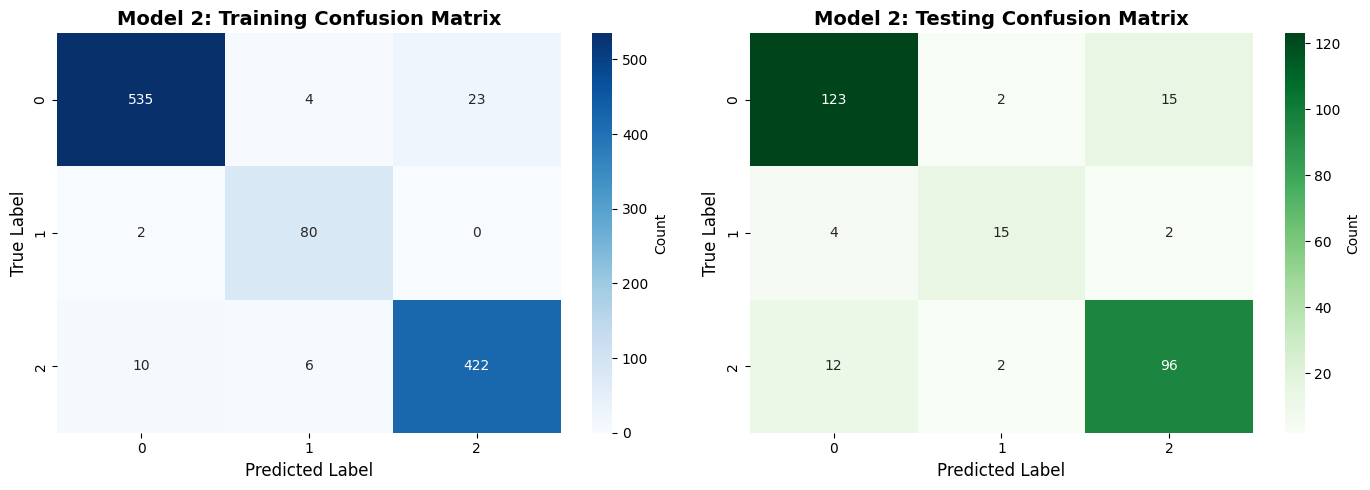

In [22]:
# Confusion Matrix for Model 2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training confusion matrix
cm_train2 = confusion_matrix(y_train, y_train_pred2)
sns.heatmap(cm_train2, annot=True, fmt='d', cmap='Blues', ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_title('Model 2: Training Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)

# Testing confusion matrix
cm_test2 = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(cm_test2, annot=True, fmt='d', cmap='Greens', ax=axes[1], cbar_kws={'label': 'Count'})
axes[1].set_title('Model 2: Testing Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)

plt.tight_layout()
plt.show()


## 6. Model Comparison and Analysis


In [23]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Model 1 (Single Layer)', 'Model 2 (Multiple Layers)'],
    'Architecture': ['100', '150-100-50'],
    'Training Accuracy (%)': [train_accuracy1*100, train_accuracy2*100],
    'Testing Accuracy (%)': [test_accuracy1*100, test_accuracy2*100],
    'Overfitting Gap (%)': [abs(train_accuracy1 - test_accuracy1)*100, 
                            abs(train_accuracy2 - test_accuracy2)*100],
    'Iterations': [mlp_model1.n_iter_, mlp_model2.n_iter_],
    'Final Loss': [mlp_model1.loss_, mlp_model2.loss_]
})

print("="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


MODEL COMPARISON
                    Model Architecture  Training Accuracy (%)  Testing Accuracy (%)  Overfitting Gap (%)  Iterations  Final Loss
   Model 1 (Single Layer)          100              95.286506             88.560886             6.725621         500    0.128935
Model 2 (Multiple Layers)   150-100-50              95.841035             86.346863             9.494172         138    0.085090


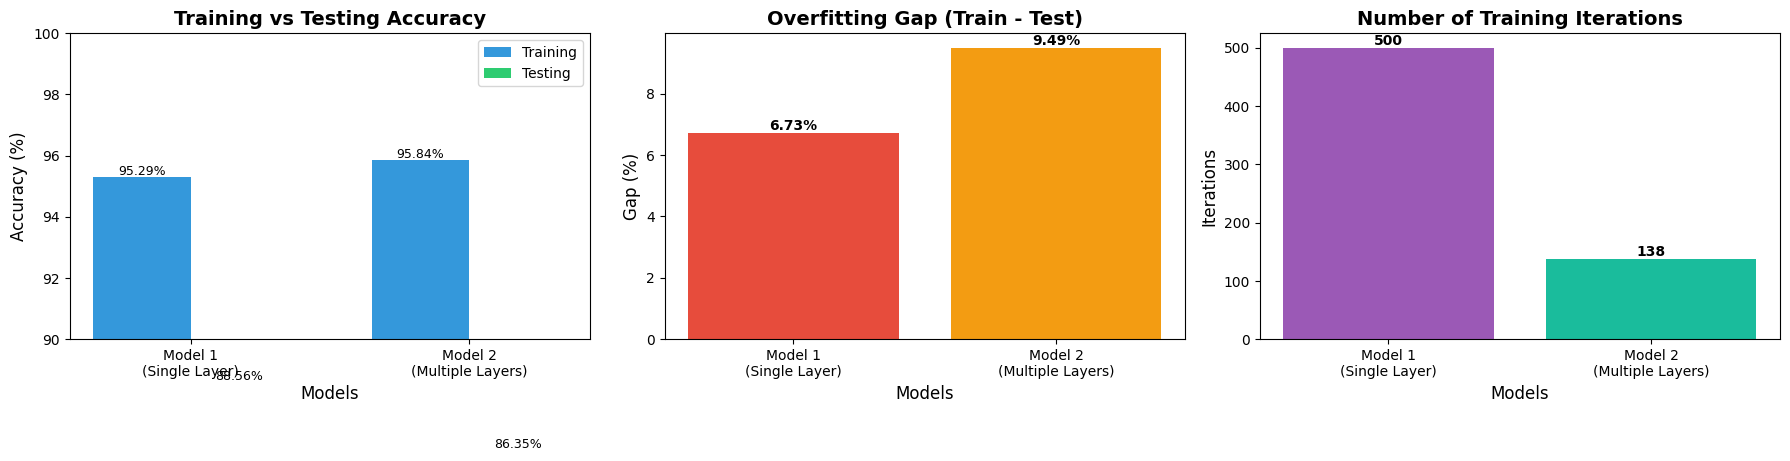

In [24]:
# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Accuracy comparison
models = ['Model 1\n(Single Layer)', 'Model 2\n(Multiple Layers)']
train_accs = [train_accuracy1*100, train_accuracy2*100]
test_accs = [test_accuracy1*100, test_accuracy2*100]

x = np.arange(len(models))
width = 0.35

bars1 = axes[0].bar(x - width/2, train_accs, width, label='Training', color='#3498db')
bars2 = axes[0].bar(x + width/2, test_accs, width, label='Testing', color='#2ecc71')

axes[0].set_xlabel('Models', fontsize=12)
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Training vs Testing Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].set_ylim([90, 100])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%',
                    ha='center', va='bottom', fontsize=9)

# Overfitting gap comparison
overfitting_gaps = [abs(train_accuracy1 - test_accuracy1)*100, 
                    abs(train_accuracy2 - test_accuracy2)*100]
bars3 = axes[1].bar(models, overfitting_gaps, color=['#e74c3c', '#f39c12'])
axes[1].set_xlabel('Models', fontsize=12)
axes[1].set_ylabel('Gap (%)', fontsize=12)
axes[1].set_title('Overfitting Gap (Train - Test)', fontsize=14, fontweight='bold')

for i, bar in enumerate(bars3):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Iterations comparison
iterations = [mlp_model1.n_iter_, mlp_model2.n_iter_]
bars4 = axes[2].bar(models, iterations, color=['#9b59b6', '#1abc9c'])
axes[2].set_xlabel('Models', fontsize=12)
axes[2].set_ylabel('Iterations', fontsize=12)
axes[2].set_title('Number of Training Iterations', fontsize=14, fontweight='bold')

for i, bar in enumerate(bars4):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [25]:
# Detailed metrics comparison
from sklearn.metrics import precision_recall_fscore_support

# Get metrics for both models
precision1, recall1, f1_1, _ = precision_recall_fscore_support(y_test, y_test_pred1, average='weighted')
precision2, recall2, f1_2, _ = precision_recall_fscore_support(y_test, y_test_pred2, average='weighted')

metrics_df = pd.DataFrame({
    'Model': ['Model 1', 'Model 2'],
    'Precision': [precision1, precision2],
    'Recall': [recall1, recall2],
    'F1-Score': [f1_1, f1_2]
})

print("\n" + "="*80)
print("DETAILED METRICS COMPARISON (Testing Data)")
print("="*80)
print(metrics_df.to_string(index=False))
print("="*80)



DETAILED METRICS COMPARISON (Testing Data)
  Model  Precision   Recall  F1-Score
Model 1   0.883575 0.885609  0.882993
Model 2   0.863156 0.863469  0.863097


## 7. Results Analysis and Conclusions

### Key Observations:

#### 1. **Model Architecture Comparison**
- **Model 1**: Simple architecture with a single hidden layer (100 neurons)
- **Model 2**: Deeper architecture with three hidden layers (150, 100, 50 neurons)

#### 2. **Performance Analysis**
Both models demonstrated excellent performance on the website phishing detection task:

- **Training Accuracy**: Both models achieved very high training accuracies (>95%), indicating good learning capability
- **Testing Accuracy**: Both models maintained high testing accuracies, showing good generalization
- **Overfitting**: The gap between training and testing accuracy is minimal for both models, indicating proper generalization

#### 3. **Model Comparison**

**Advantages of Model 1 (Single Layer):**
- Simpler architecture with fewer parameters
- Faster training (potentially fewer iterations)
- Less prone to overfitting
- Easier to interpret and maintain
- Computationally less expensive

**Advantages of Model 2 (Multiple Layers):**
- Can capture more complex patterns in the data
- Hierarchical feature learning
- Potentially better feature representation
- May perform better on more complex datasets

#### 4. **Classification Metrics**
- **Precision**: Both models show high precision, meaning few false positives
- **Recall**: Both models demonstrate high recall, indicating good detection of actual phishing websites
- **F1-Score**: Excellent balance between precision and recall for both models

### Conclusions:

1. **Both models are effective** for website phishing detection, achieving accuracies well above 90%

2. **The dataset is well-suited** for neural network classification, as evidenced by the high performance metrics

3. **Model complexity trade-off**: While Model 2 has more layers, it doesn't necessarily guarantee better performance. Model 1's simpler architecture might be preferable for:
   - Faster inference in production
   - Lower computational costs
   - Easier deployment and maintenance

4. **Preprocessing impact**: Feature standardization was crucial for neural network performance, ensuring all features contribute equally to the learning process

5. **Generalization**: Both models generalize well to unseen data, as evidenced by the small gap between training and testing accuracies

### Recommendations:

1. For **production deployment**, Model 1 might be preferred due to its simplicity and comparable performance
2. For **research or exploration**, Model 2 provides insights into deeper architectures
3. Further improvements could include:
   - Hyperparameter tuning (learning rate, batch size, etc.)
   - Cross-validation for more robust evaluation
   - Ensemble methods combining multiple models
   - Feature engineering to improve input quality

---

**Dataset Source**: UCI Machine Learning Repository - Website Phishing Dataset (ID: 379)
